##  K-Means Clustering

## importing important libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


## importing data

In [2]:
data1=pd.read_csv("C:/Users/PC-LENOVO/Documents/Machine Learning/new sir/ass1_knnregressor.csv")


### Data Cleaning

In [3]:
data=data1.drop('Price', axis=1)
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
0,1177.698,2,7,2,2,2
1,2134.800,5,7,4,2,2
2,1138.560,5,7,2,2,1
3,1458.780,2,7,3,2,2
4,967.776,11,14,3,2,2


In [4]:
data.tail()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
640,1359.156,7,15,3,2,2
641,377.148,4,10,1,1,1
642,740.064,13,14,1,1,1
643,1707.840,3,14,3,2,2
644,1376.946,6,7,3,2,1


## checking for null values

In [5]:
data.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
dtype: int64

### Selecting columns for k-means clustering

In [6]:
X = data.iloc[:, 0:6 ].values
print(X)

[[1.177698e+03 2.000000e+00 7.000000e+00 2.000000e+00 2.000000e+00
  2.000000e+00]
 [2.134800e+03 5.000000e+00 7.000000e+00 4.000000e+00 2.000000e+00
  2.000000e+00]
 [1.138560e+03 5.000000e+00 7.000000e+00 2.000000e+00 2.000000e+00
  1.000000e+00]
 ...
 [7.400640e+02 1.300000e+01 1.400000e+01 1.000000e+00 1.000000e+00
  1.000000e+00]
 [1.707840e+03 3.000000e+00 1.400000e+01 3.000000e+00 2.000000e+00
  2.000000e+00]
 [1.376946e+03 6.000000e+00 7.000000e+00 3.000000e+00 2.000000e+00
  1.000000e+00]]


## Using the elbow method to find the optimal number of clusters

<function matplotlib.pyplot.show(close=None, block=None)>

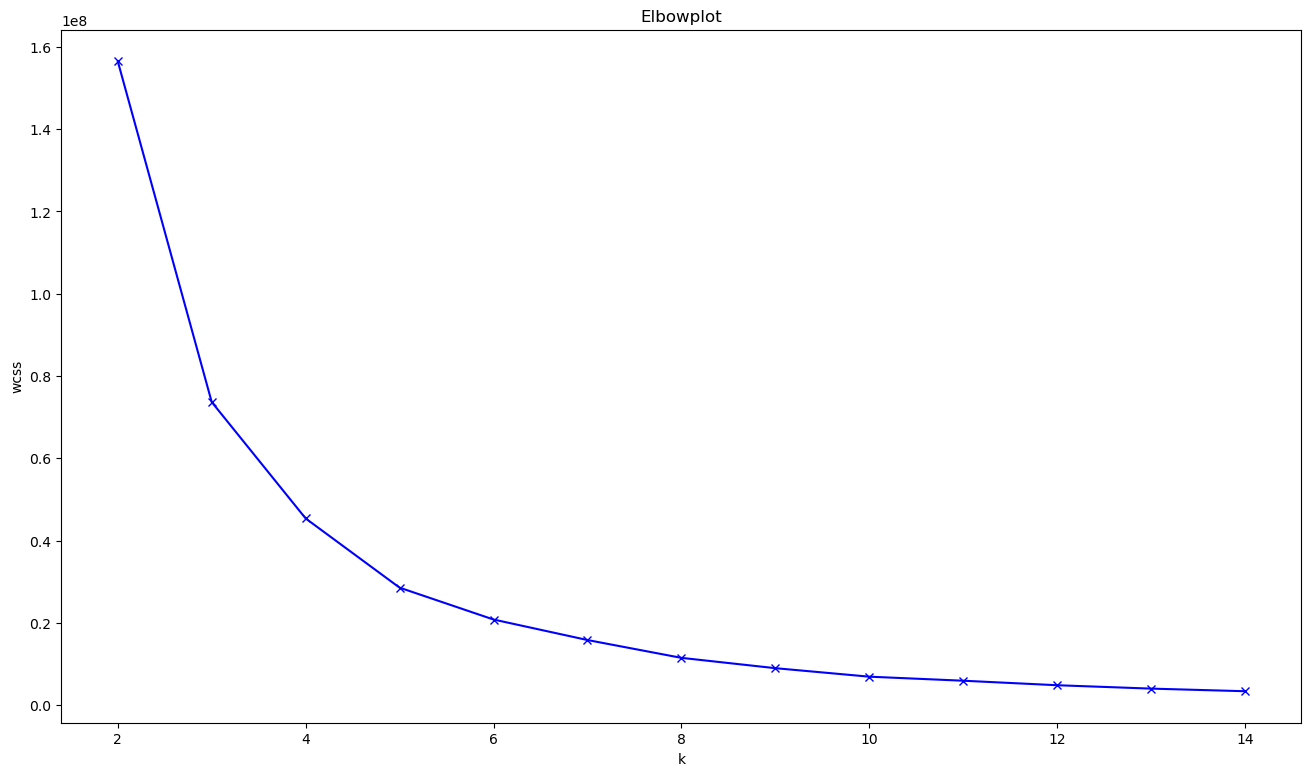

In [7]:
from sklearn.cluster import KMeans


wcss=[]
for i in range(2,15):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (16, 9))    
k=range(2,15)    
plt.plot(k,wcss,'bx-')
plt.title('Elbowplot')
plt.xlabel('k')
plt.ylabel('wcss')
plt.show


From this elbow graph we conclude that the optimal value of k is 6

In [8]:
print(wcss)

[156514488.79683936, 73677399.17206024, 45379311.029687084, 28558082.136747, 20811535.17000721, 15826633.515470536, 11492900.950125823, 8985236.596090958, 6919035.797254524, 5935978.705239148, 4840680.893634903, 4017661.0810493855, 3383654.791731664]


## Training the K-means model on the dataset with the optimal k value

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [10]:
y_kmeans

array([5, 3, 5, 2, 5, 5, 5, 0, 5, 2, 0, 0, 5, 0, 3, 1, 0, 0, 1, 5, 3, 1,
       0, 2, 1, 2, 1, 1, 0, 0, 2, 5, 3, 5, 0, 0, 0, 0, 1, 0, 1, 0, 5, 5,
       2, 2, 2, 3, 1, 0, 3, 2, 0, 0, 4, 3, 0, 5, 0, 5, 0, 0, 2, 5, 0, 0,
       5, 0, 0, 5, 0, 5, 3, 5, 0, 2, 3, 2, 2, 0, 2, 0, 0, 0, 5, 2, 1, 2,
       3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 1, 1, 1, 2, 1, 0, 3, 3,
       3, 0, 3, 3, 2, 2, 1, 0, 0, 5, 0, 5, 3, 3, 3, 5, 5, 3, 5, 0, 2, 2,
       3, 5, 2, 3, 0, 2, 3, 5, 1, 5, 5, 5, 5, 0, 3, 4, 5, 2, 2, 3, 2, 0,
       5, 5, 0, 2, 5, 2, 2, 0, 0, 4, 5, 2, 3, 3, 2, 5, 3, 2, 3, 1, 0, 2,
       3, 5, 2, 2, 2, 0, 1, 5, 5, 5, 5, 5, 5, 2, 0, 0, 3, 3, 2, 2, 2, 0,
       0, 2, 5, 2, 5, 0, 5, 3, 0, 5, 2, 2, 2, 0, 3, 0, 5, 2, 2, 3, 0, 3,
       5, 3, 1, 0, 3, 0, 5, 0, 3, 2, 2, 2, 3, 2, 2, 0, 2, 2, 0, 3, 0, 2,
       1, 3, 3, 5, 1, 0, 1, 3, 2, 1, 3, 2, 3, 0, 0, 5, 1, 2, 0, 0, 2, 3,
       5, 5, 0, 0, 5, 5, 5, 3, 0, 0, 5, 2, 5, 2, 2, 0, 0, 3, 2, 5, 3, 2,
       1, 3, 0, 3, 2, 0, 3, 5, 2, 2, 1, 1, 1, 1, 3,

### Visualising the clusters

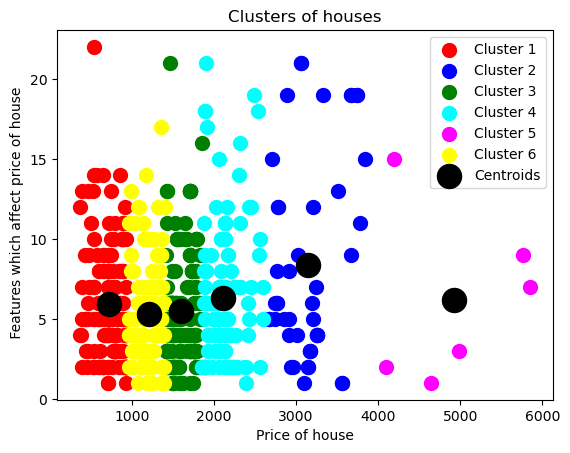

In [11]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'yellow', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of houses')
plt.xlabel('Price of house')
plt.ylabel(' Features which affect price of house')
plt.legend()

plt.show()